# Case Study on Regression

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#load the dataset and display

data = pd.read_csv(r'C:\Users\HP\Desktop\Python DSA\assignments\New folder\car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Basic details of the dataset

In [3]:
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


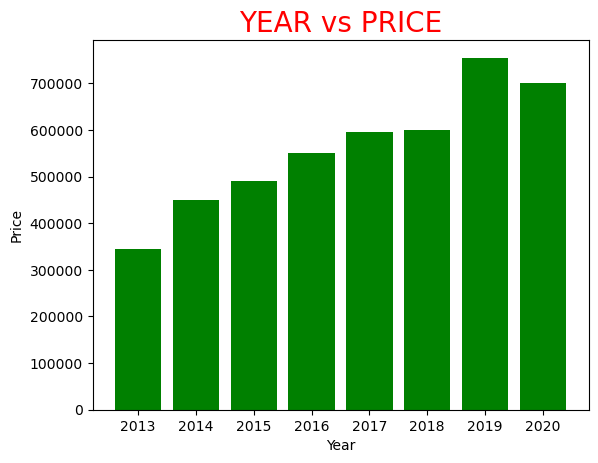

In [7]:
#plot bar graph to show the relationhip between price and year

plt.bar(data['Year'],data['Price'],color='g')
plt.title('YEAR vs PRICE',size=20,c='r',)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


# Data Preprocessing

# 1. Missing value handling 

In [8]:
#check for missing vaue

data.isna().sum()

Year     0
Price    0
dtype: int64

There is no missing values in the dataset.

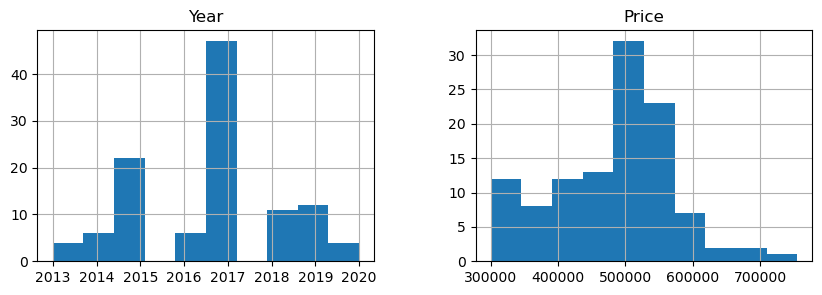

In [9]:
fregraph = data.select_dtypes(include=['int'])
fregraph.hist(figsize=(10,3))
plt.show()

# 2. Outlier detection

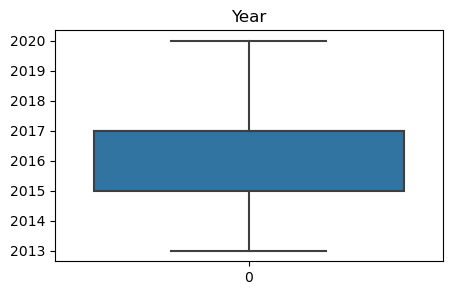

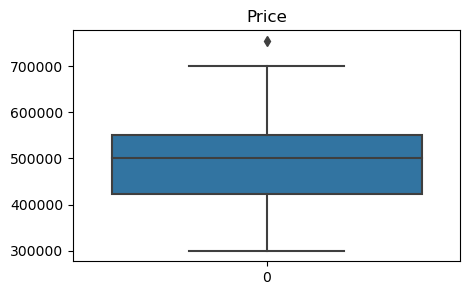

In [10]:
# check for outliers

num_cols = ['Year', 'Price']
for i in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data[i])
    plt.title(i)

There is one outlier in price column of the data set.

# 3. Encoding 

No encoding is required for this data set.

# 4. Correlation Heatmap

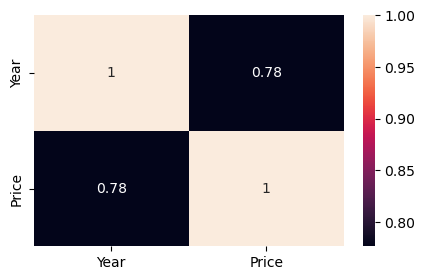

In [11]:
corrmatrix = data.corr()
plt.figure(figsize=(5,3))
sns.heatmap(corrmatrix,annot = True)
plt.show()

# 5. Scaling

No scaling is required for this data set.

In [12]:
#splitting the data

x = data.drop(['Price'],axis =1)  # features or independent variables 
y = data['Price'] # target or dependent variable

In [13]:
#training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=28)

In [14]:
#display x_train and x_test

x_train,x_test

(     Year
 73   2013
 75   2017
 6    2016
 33   2017
 106  2015
 ..    ...
 3    2018
 32   2017
 22   2015
 5    2015
 1    2019
 
 [89 rows x 1 columns],
      Year
 52   2013
 63   2017
 0    2018
 107  2016
 61   2017
 14   2017
 30   2019
 97   2020
 53   2013
 35   2017
 82   2015
 40   2019
 9    2017
 98   2020
 13   2019
 71   2017
 81   2014
 18   2019
 48   2016
 21   2019
 49   2018
 50   2013
 36   2017)

In [15]:
#display y_train and y_test

y_train,y_test

(73     320000
 75     490000
 6      425000
 33     550000
 106    300000
         ...  
 3      465000
 32     550000
 22     434999
 5      350000
 1      755000
 Name: Price, Length: 89, dtype: int64,
 52     345000
 63     595000
 0      465000
 107    375000
 61     540000
 14     475000
 30     650000
 97     640000
 53     345000
 35     550000
 82     390000
 40     525000
 9      575000
 98     700000
 13     600000
 71     490000
 81     390000
 18     500000
 48     396000
 21     500000
 49     600000
 50     325000
 36     550000
 Name: Price, dtype: int64)

# Linear Regression Model

In [16]:
lr = LinearRegression()
Linear_model = lr.fit(x_train,y_train)

In [17]:
y_pred_lin = Linear_model.predict(x_test)

In [18]:
#display y predict and y test

y_pred_lin,y_test

(array([321689.11862396, 497209.93665481, 541090.14116251, 453329.7321471 ,
        497209.93665481, 497209.93665481, 584970.34567022, 628850.55017793,
        321689.11862396, 497209.93665481, 409449.52763939, 584970.34567022,
        497209.93665481, 628850.55017793, 584970.34567022, 497209.93665481,
        365569.32313167, 584970.34567022, 453329.7321471 , 584970.34567022,
        541090.14116251, 321689.11862396, 497209.93665481]),
 52     345000
 63     595000
 0      465000
 107    375000
 61     540000
 14     475000
 30     650000
 97     640000
 53     345000
 35     550000
 82     390000
 40     525000
 9      575000
 98     700000
 13     600000
 71     490000
 81     390000
 18     500000
 48     396000
 21     500000
 49     600000
 50     325000
 36     550000
 Name: Price, dtype: int64)

In [19]:
#Mean squared error (MSE) and R-Squared error

Linear_mse = mean_squared_error(y_test,y_pred_lin)
Linear_r2 = r2_score(y_test,y_pred_lin)

print('Linear MSE = ',Linear_mse)
print('Linear r2 = ',Linear_r2)

Linear MSE =  3130300571.490845
Linear r2 =  0.7179045607182537


In [20]:
import warnings 
warnings.filterwarnings('ignore', category=UserWarning)

In [21]:
#predicting price

Linear_model_predicted_price =Linear_model.predict([[2022]])
print('Linear model predicted price = ', Linear_model_predicted_price)

Linear model predicted price =  [716610.95919335]


# Lasso Regression Model

In [22]:
ls = Lasso(alpha = 0.01)
Lasso_model = ls.fit(x_train,y_train)

In [23]:
y_pred_lasso =Lasso_model.predict(x_test)

In [24]:
#display y predict and y test

y_pred_lasso,y_test

(array([321689.135516  , 497209.93475445, 541090.13456406, 453329.73494484,
        497209.93475445, 497209.93475445, 584970.33437365, 628850.53418326,
        321689.135516  , 497209.93475445, 409449.53513522, 584970.33437365,
        497209.93475445, 628850.53418326, 584970.33437365, 497209.93475445,
        365569.33532561, 584970.33437365, 453329.73494484, 584970.33437365,
        541090.13456406, 321689.135516  , 497209.93475445]),
 52     345000
 63     595000
 0      465000
 107    375000
 61     540000
 14     475000
 30     650000
 97     640000
 53     345000
 35     550000
 82     390000
 40     525000
 9      575000
 98     700000
 13     600000
 71     490000
 81     390000
 18     500000
 48     396000
 21     500000
 49     600000
 50     325000
 36     550000
 Name: Price, dtype: int64)

In [25]:
#Mean squared error (MSE) and R-Squared error

Lasso_mse = mean_squared_error(y_test,y_pred_lasso)
Lasso_r2 = r2_score(y_test,y_pred_lasso)

print('Lasso MSE = ',Lasso_mse)
print('Lasso r2 = ',Lasso_r2)

Lasso MSE =  3130300523.9990044
Lasso r2 =  0.7179045649981085


In [26]:
#predicting price

Lasso_model_predicted_price =Lasso_model.predict([[2022]])
print('Lasso model predicted price = ',Lasso_model_predicted_price)

Lasso model predicted price =  [716610.93380249]


# Selecting model

In [27]:
if Linear_mse < Lasso_mse and Linear_r2 > Lasso_r2:
    selected_model = Linear_model
    print("Selected model - Linear Regression model")
elif Lasso_mse < Linear_mse and Lasso_r2 > Linear_r2:
    selected_model = Lasso_model
    print("Selected model - Lasso Regression model")
else:
    print("Both models have similar performance.")

Selected model - Lasso Regression model


Lasso is slightly performing better than Linear.

In [28]:
print('The possible price of a 2022 model second-hand Hyundai grand i10 car is : ', Lasso_model_predicted_price[0])

The possible price of a 2022 model second-hand Hyundai grand i10 car is :  716610.9338024855
